Project 1 - Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

# Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

# Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [95]:
df = pd.read_csv('train.csv')

In [96]:
df.shape

(4209, 378)

In [97]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_test = pd.read_csv('test.csv')
df_test.shape

(4209, 377)

In [99]:
df.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)
df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


**There is no output variable for test dataset. so we cannot use test data to evaluate the model**

In [101]:
dtypes_df  = df.dtypes.reset_index()
dtypes_df.columns = ['feature_name','data_types']
dtypes_df.groupby('data_types').agg('count')

,feature_name
data_types,
int64,368
float64,1
object,8


In [102]:
# Identify features with null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [103]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [104]:
# Identifying Categorical Data
cat_columns = dtypes_df[dtypes_df.data_types == 'object'].feature_name
cat_columns

1    X0
2    X1
3    X2
4    X3
5    X4
6    X5
7    X6
8    X8
Name: feature_name, dtype: object

In [105]:
# Identifying columns with unique values.
non_cat_df = df[df.columns[~df.columns.isin(cat_columns)]]
const_columns = non_cat_df.columns[non_cat_df.nunique() <= 1]
const_columns

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [106]:
#  Since constant values are not making impact to final result we need to remove those columns
df.drop(const_columns,axis=1, inplace=True)
print(df.shape)

(4209, 365)


In [107]:
df_test.drop(const_columns,axis=1, inplace=True)
print(df.shape)

(4209, 365)


In [108]:
# Dropping columns with similar values,.
df = df.T.drop_duplicates().T

In [109]:
df

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,0,0,1,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,0,0,1,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,0,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,ak,s,as,c,d,aa,d,q,0,...,0,0,1,0,0,0,0,0,0,0
4205,108.77,j,o,t,d,d,aa,h,h,0,...,0,0,0,1,0,0,0,0,0,0
4206,109.22,ak,v,r,a,d,aa,g,e,0,...,0,0,0,0,1,0,0,0,0,0
4207,87.48,al,r,e,f,d,aa,l,u,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
# Dropping columns with similar values,.
df_test = df_test[df.columns.drop('y')]
df_test.shape

(4209, 319)

In [111]:
# Identifying columns with binery data varience
binery_columns = df.columns[df.nunique() == 2]
binery_columns

Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X373', 'X374', 'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X383',
       'X384'],
      dtype='object', length=311)

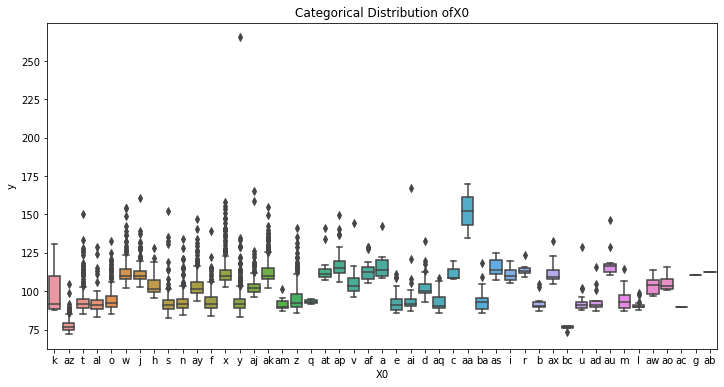

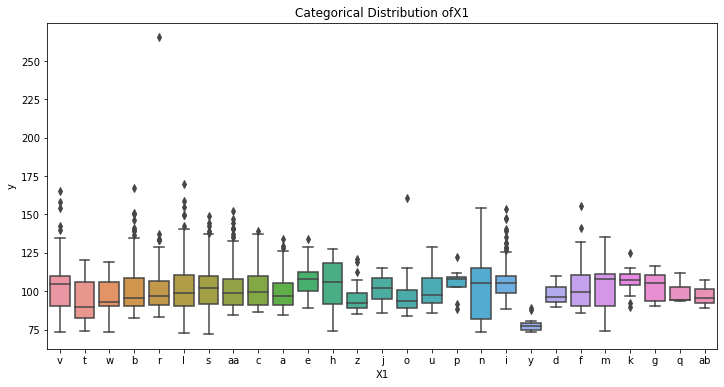

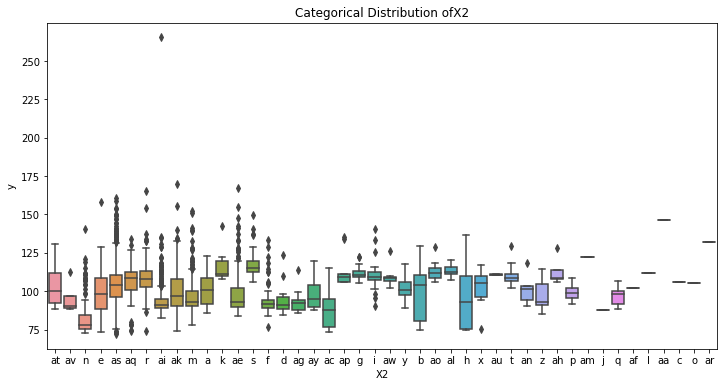

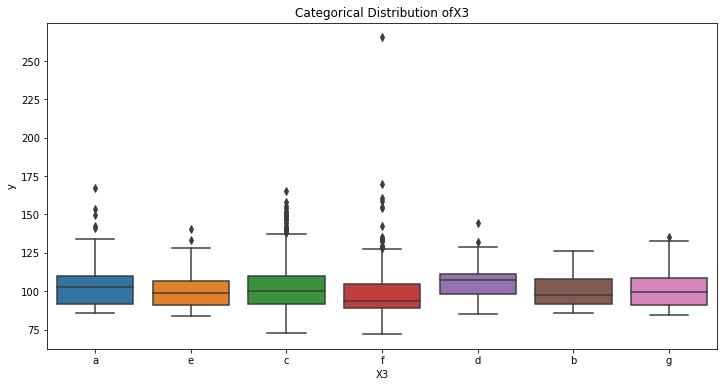

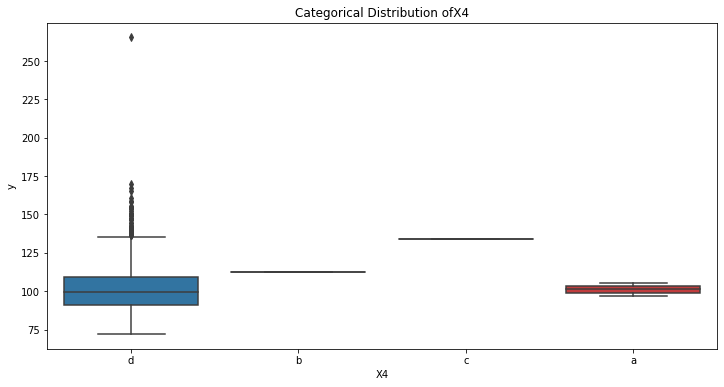

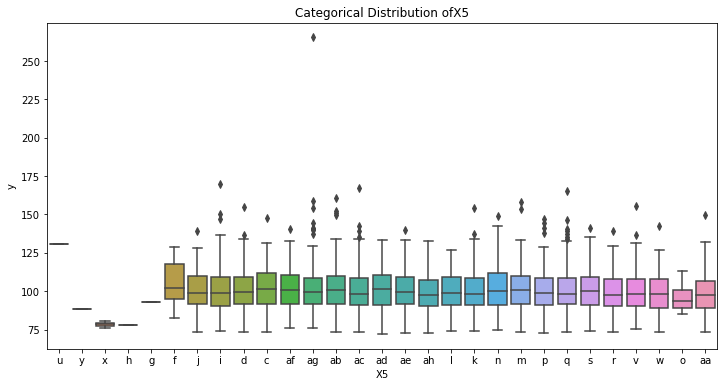

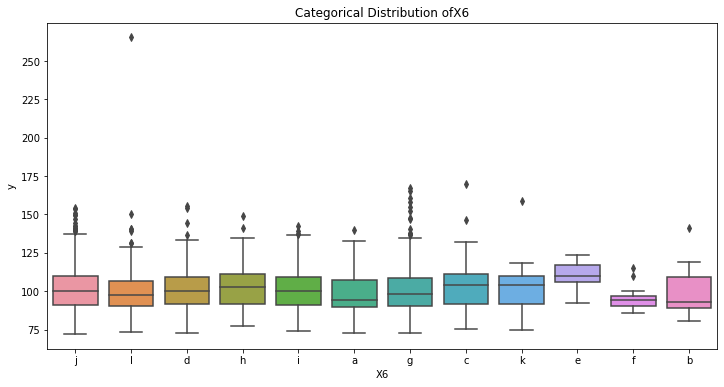

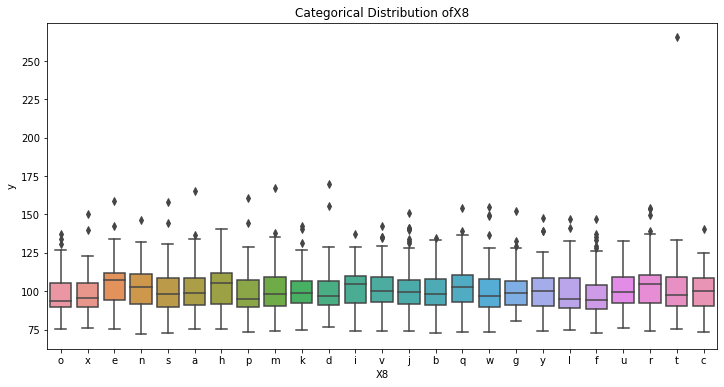

In [112]:
for col in cat_columns :
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col,y="y",data=df)
    plt.xlabel(col)
    plt.ylabel("y")
    plt.title("Categorical Distribution of"+col)
    plt.show()

In [113]:
# as per categorical destribution X4 feature is skewed towards d category. Hense X4 need to be removed from data
df.drop('X4', axis=1, inplace=True)
cat_columns.drop(5, inplace=True)

D:\inu\Applications\anaconda3\envs\ml_train\lib\site-packages\pandas\core\series.py:4450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
df.shape

(4209, 319)

In [115]:
df_test.drop('X4', axis=1, inplace=True)
df_test.shape

(4209, 318)

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

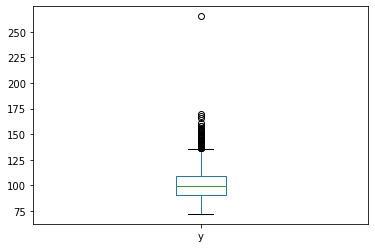

In [116]:
# Identifying outliers of data
plt.figure(figsize=(12,8))
df.plot.box(y='y')

In [117]:
# As per data there we can clearly identify one outlier. we should remove such data
outlier_index = df[df['y'] > 200].index
df.drop(index=outlier_index, axis=0, inplace=True)

In [118]:
df.shape

(4208, 319)

In [119]:
y = df['y']
df.drop('y', inplace=True, axis=1)

In [120]:
# Appling label encoder for categorical data columns.
df = pd.get_dummies(df, columns=cat_columns, dtype=int)
df

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [121]:
df_test = pd.get_dummies(df_test, columns=cat_columns, dtype=int)
df_test.shape

(4209, 508)

In [122]:
# Seems there are new catogorical features in test data. we need to remove those columns from test data
col_remove = df.columns[~df.columns.isin(df_test.columns)]
col_remove                   

Index(['X0_aa', 'X0_ab', 'X0_ac', 'X0_q', 'X2_aa', 'X2_ar', 'X2_c', 'X2_l',
       'X2_o', 'X5_u'],
      dtype='object')

In [123]:
col_remove_test =df_test.columns[~df_test.columns.isin(df.columns)]
col_remove_test

Index(['X0_ae', 'X0_ag', 'X0_an', 'X0_av', 'X0_bb', 'X0_p', 'X2_ab', 'X2_ad',
       'X2_aj', 'X2_ax', 'X2_u', 'X2_w', 'X5_a', 'X5_b', 'X5_t', 'X5_z'],
      dtype='object')

In [125]:
df.drop(col_remove, inplace=True, axis=1)
df.shape

(4208, 492)

In [126]:
df_test.drop(col_remove_test, inplace=True, axis=1)

In [127]:
df_test.shape

(4209, 492)

In [128]:
df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: object

In [130]:
y = y.apply(pd.to_numeric)

In [132]:
df.shape

(4208, 492)

In [134]:
dtypes_df  = df.dtypes.reset_index()
dtypes_df.columns = ['feature_name','data_types']
dtypes_df.groupby('data_types').agg('count')

,feature_name
data_types,
int32,181
object,311


In [136]:
x = df.apply(pd.to_numeric)

In [137]:
dtypes_df  = x.dtypes.reset_index()
dtypes_df.columns = ['feature_name','data_types']
dtypes_df.groupby('data_types').agg('count')

,feature_name
data_types,
int32,181
int64,311


In [140]:
x_test = df_test.apply(pd.to_numeric)

**1. Since we have high number of feature we need to use Dimensionality reduction machanism to reduce number of features**

**2. Since all values are 0s and 1s, no need to scale data**

In [141]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [144]:
pca = PCA(n_components = 0.95)

In [145]:
x = pca.fit_transform(x)
x.shape

(4208, 138)

In [146]:
x

array([[ 6.60926572e-01, -1.15596574e+00,  1.94012681e+00, ...,
        -2.13595595e-03, -1.87675222e-01,  4.38703854e-01],
       [-1.67033871e-01, -1.22557835e+00, -2.35113155e-01, ...,
        -3.01029188e-02,  1.09557242e-01, -7.62180311e-02],
       [-7.77016858e-01, -2.03144302e+00,  1.81687022e+00, ...,
        -2.53588946e-01, -2.17502885e-01, -3.86843058e-01],
       ...,
       [-8.21799039e-01, -5.69593862e-01,  1.78162234e+00, ...,
         1.02313177e-01,  1.84623934e-01,  3.35121503e-03],
       [ 6.14512186e-01, -1.14157879e+00, -2.84884104e+00, ...,
        -2.40917827e-01,  1.27655399e-01, -1.52077300e-01],
       [ 1.07906505e+00, -9.40502935e-01, -1.13033950e+00, ...,
         1.17473191e-01,  2.49377157e-01, -7.38630807e-02]])

In [147]:
x_test = pca.transform(df_test)
x_test.shape

(4209, 138)

In [148]:
model_1 = XGBRegressor(n_estimators = 500,
                        subsample = 0.5,
                        max_depth = 10,
                        learning_rate = 0.05,
                        min_child_weight = 1,
                        random_state = 6,)

In [150]:
Kfold = model_selection.KFold(n_splits=10)

In [151]:
results_x = model_selection.cross_val_score(model_1, x,y, cv = Kfold)

In [152]:
results_x

array([0.54952792, 0.51823051, 0.50000712, 0.50133735, 0.62196699,
       0.48145936, 0.40158589, 0.52381684, 0.54624192, 0.59254399])

In [153]:
results_x.mean()

0.5236717897787532

#### Boosting model using hyper parameter tuning with GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid_gbr = {'learning_rate': [0.01,0.05,0.1,0.5],
              'n_estimators' : [500],
              'subsample' : [0.3,0.5,0.9],
                 'max_depth' : [5,10,15] }

In [168]:
gbr = XGBRegressor()

In [169]:
mse_grid = GridSearchCV(estimator = gbr, param_grid = param_grid_gbr, scoring = 'neg_mean_squared_error', cv = 4, verbose = 1)

mse_grid.fit(x,y)

print("Best parameter: ", mse_grid.best_params_)
print("Lowest RMSE: ", np.sqrt(np.abs(mse_grid.best_score_)))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best parameter:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}
Lowest RMSE:  8.51982768662196


In [170]:
y_predict = mse_grid.predict(x_test)

In [172]:
y_predict

array([ 78.39285,  91.73468,  77.41896, ...,  92.07721, 109.70199,
        93.66091], dtype=float32)

In [173]:
y_predict.shape

(4209,)

In [174]:
df_pred = pd.read_csv('test.csv')
df_pred.shape

(4209, 377)

In [175]:
df_pred['y'] = y_predict

In [176]:
df_pred

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,1,az,v,n,f,d,t,a,w,0,...,0,0,1,0,0,0,0,0,0,78.392853
1,2,t,b,ai,a,d,b,g,y,0,...,0,1,0,0,0,0,0,0,0,91.734680
2,3,az,v,as,f,d,a,j,j,0,...,0,0,1,0,0,0,0,0,0,77.418961
3,4,az,l,n,f,d,z,l,n,0,...,0,0,1,0,0,0,0,0,0,78.342514
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,0,0,0,0,0,110.444023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,104.344208
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,1,0,0,0,0,0,0,0,0,92.704834
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,92.077209
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,1,0,0,0,0,0,0,0,109.701988


In [179]:
df_pred.to_csv('test_pred.csv')